In [1]:
# create dataset of derived dimensions
import pandas as pd
df = pd.read_csv('DERIVED_DIMENSIONS.csv')

# Array for base units
base_units = ['L', 'M', 'T', 'K', 'I', 'N', 'J']
# create column for length
base_dim_array = []
for i, row in df.iterrows():
    ba = []
    for bu in base_units:
        dq = 0 
        try:   
            for d in row['Dimension'].split(' '):
                if bu in d:
                    dq = 1
                    if len(d)>1:
                        d = d.replace("−", "-")
                        dq=d[1:]
        except: pass
        ba.append(dq) 
    base_dim_array.append(ba)

for i, bu in enumerate(base_units): 
    df[bu] = [a[i] for a in base_dim_array]
    df[bu] = df[bu].astype(float)
df.to_csv('Dimensions.csv')
# summarize 

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df = pd.read_csv('Dimensions.csv')
def dim_dist(dim):
    plt.clf()
    u_count = df[dim].unique()
    plt.hist(df.L, bins=len(u_count))
    plt.bar()
    plt.title(f'Distribution of {dim}')
    


In [32]:
def bar_diag(dimension):
    dim_counts = df[dimension].value_counts()
    sorted_x, sorted_y = zip(*sorted(zip(dim_counts.index, dim_counts)))
    plt.clf()
    plt.bar(sorted_x, sorted_y)
    # df['L'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
    plt.xlabel("Dimension Count")
    plt.ylabel("Dimension of Unit")
    plt.title(f"Count of Dimension {dimension}")
    plt.savefig(f"{dimension}_dist")
    # plt.show()

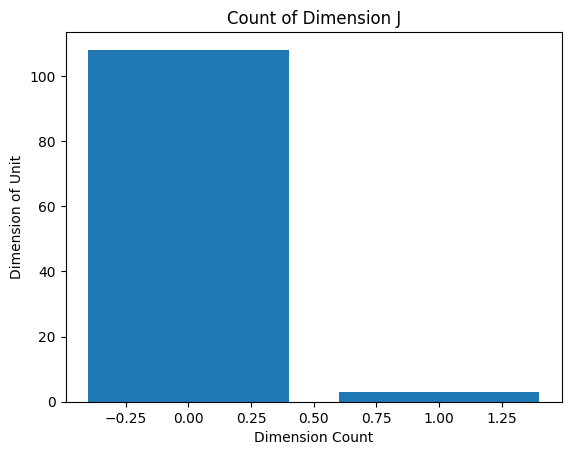

In [33]:
for d in ['L', 'M', 'T', 'K', 'I', 'N', 'J']:
    bar_diag(d)